# Modulus of Permutations

### Information
Student: Vinny Sun

Graduate Mentor: Ngoc Huy Truong\
Faculty Mentor: Pietro Poggi-Corradini

Funded by:\
NSF DMS 2154032\
K-State Arts & Sciences Scholarship\
K-State Scholar Development and Undergraduate Research (SDUR) Research Award

under NODE Group activities

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# import cdd
import math
import cvxpy as cvx
# from collections import deque
import random

### Items Read
Mathematics of Networks: Modulus Theory and Convex Optimization, Nathan Albin and Pietro Poggi-Corradini

Finding a Minimum Independent Dominating Set in a Permutation Graph, Mikhail J. Atallah

Maintenance of Configurations in the plane, Mark H. Overmars and Jan van Leeuwen

### Permutations

An ordering of elements

Consider the permutation of $1,\dots,5$:

$$
\pi = 2\ 1\ 4\ 5\ 3
$$


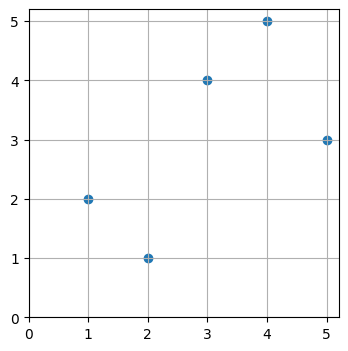

In [2]:
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

fig, fig = plt.subplots(figsize=(4, 4))
    
plt.scatter(x,pi)

fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

### Maximal Increasing Subsequence (MISS)

A subsequence of increasing elements in the permutation that cannot be extended 

For $2\ 1\ 4\ 5\ 3$

$1\ 4\ 5$ is a MISS corresponding to indices $2\ 3\ 4$

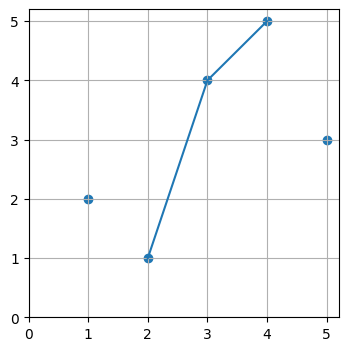

In [3]:
pi =  [2, 1, 4, 5, 3]
x = range(1,6)

ga = [1, 4, 5]
I = [2, 3, 4]

# initialize figure
fig, fig = plt.subplots(figsize=(4, 4))
    
plt.scatter(x,pi)
plt.plot(I,ga)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,6))
fig.set_yticks(range(0,6))
plt.grid(True)

### Working towards the modulus

$\Gamma$ is a family of objects $\gamma$. 

Then $\mathcal{N}$ is the *usage matrix* of objects in $\Gamma$.

For example, the entry for the previous MISS would be [0 1 1 1 0]

Now we want all MISS. This is a subgraph of all up and right paths

[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4)]


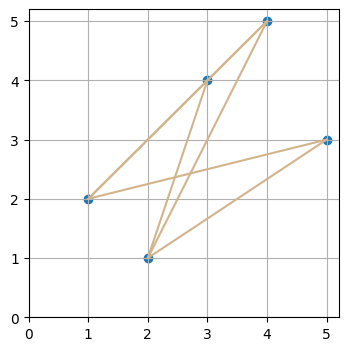

In [4]:
def plot_all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        valid_connections.add((connection[0] + 1, connection[1] + 1))
        x1, x2 = connection[0], connection[1]
        plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections

print(plot_all_connections(pi))

We just need to remove the "shortcuts"

```python
def in_box(t, s):
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False
```

[(1, 3), (1, 5), (2, 3), (2, 5), (3, 4)]

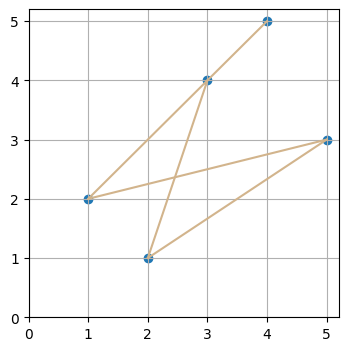

In [5]:
def plot_all_connections(s):
    """returns all valid connections in MISS

    Args:
        s (list): sequence to generate connections from

    Returns:
        list of tuples: (x1, x2) where (x1, s[x1]) (x2, s[x2]) is a valid connection of up and right paths that are part of a MISS
    """
    connections = []
    for i in range(len(s)):
        for j in range(i, len(s)):
            # using the above rule
            if ((j - i) * (s[j] - s[i])) > 0:
                connections.append((i, j))
    # gets rid of duplicates
    connections = list(set(connections))

    plt.figure(figsize=(4, 4))
    plt.scatter(range(1, len(s) + 1), s)

    valid_connections = set()

    for connection in connections:
        if not in_box(connection, s):
            valid_connections.add((connection[0] + 1, connection[1] + 1))
            x1, x2 = connection[0], connection[1]
            plt.plot([x1 + 1, x2 + 1], [s[x1], s[x2]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    connections = sorted(list(valid_connections))

    return connections


def in_box(t, s):
    """returns whether there is another point in the box extending horizontal and vertical lines from both points

    Args:
        t (tuple): connection to be checked
        s (list): main seequence

    Returns:
        bool: whether there exists a point in the box
    """
    i, j = t[0], t[1]
    if any(s[x] < s[j] and s[x] > s[i] for x in range(i + 1, j)):
        return True
    return False

pi = [2, 1, 4, 5, 3]

plot_all_connections(pi)

#### How can we generate all of these MISS in a usage matrix?

Essentially depth first search (code if interested)

```python
def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def recursive_function(s):
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return m
```

usage matrix from recursive function:
[[1. 0. 1. 1. 0.]
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 0. 0. 1.]]


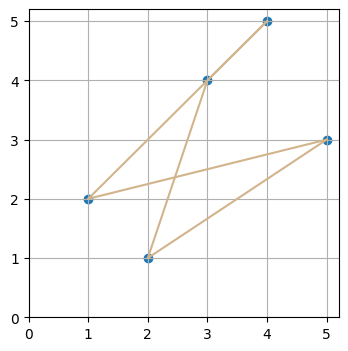

In [26]:
def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            # print(f"i {i}")
            # print(s[i], s[x])
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
            # print(greater)
        # greater = [i for i in range(x, len(s)) if s[i] > s[x] and not any(s[j] < s[i] for j in range(x + 1, i))]
        # print("greater:")
        # print(greater)
        # print("s[greater]:")
        # print([s[i] for i in greater])
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            # print(f"m:\n {m}")
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        # print(source)
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(4, 4))

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    return m

pi = [2, 1, 4, 5, 3]

print("usage matrix from recursive function:")
print(plot_all_MISS(pi))

We can also do this with larger permutations

$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$

71 rows in usage matrix


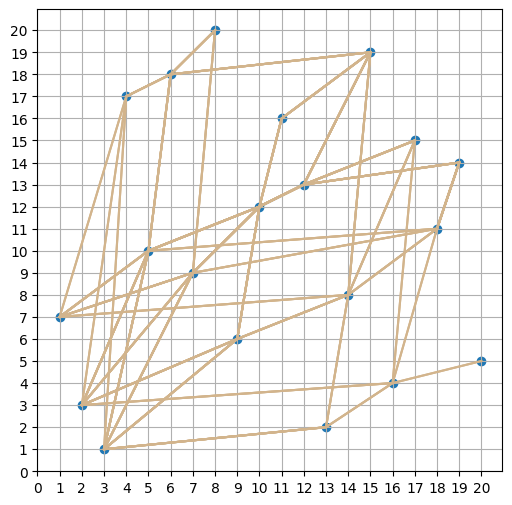

In [29]:
def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def plot_all_MISS(s):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m
            m = np.concatenate((m, [row]), axis=0)
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(6, 6))

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)
    print(f'{len(m)} rows in usage matrix')
    return

pi =  [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

plot_all_MISS(pi)

### Modulus

Now we have an efficient way to generate all MISS (we have our objects)

We must define $\rho \in \mathbb{R}_{+}^{N}$ (essentially node weights) and the $\rho$-length as $\ell_\rho(\gamma) := \sum_{j=1}^{N} \mathcal{N}(\gamma, j)\rho(j)$ (the "cost" of a MISS)

And admissibility:
$\rho$ is admissible for $\Gamma$ if $\ell_\rho(\gamma) \geq 1 \: \forall \: \gamma \in \Gamma$

Now we can define the *p-Modulus*
$\text{Mod}(\Gamma) = \inf\limits_{\rho \in \text{Adm}(\Gamma)} \sum_{j=1}^{N} \rho(j)^p$

### Two algorithms for computing modulus:

+ Basic Algorithm
+ Plus-1 Algorithm


basic algo
```python
while True:
    usage_row, lightest_value = lightest_path(pi, rho)

    if lightest_value >= 1:
        break
    
    N = add_constraint(N, usage_row)

    mod, rho = modulus(N, p)
```

plus 1
```python
for _ in range(num_iter):
    _, usage_row, lightest_value = lightest_path(pi, eta)
    for x in np.nonzero(usage_row):
        eta[x] += 1

eta = eta / num_iter
mod = 1. / sum(i ** 2 for i in eta)
```

Both of these algorithms need the *lightest* MISS given some node weights \
This is an easy change

Given our larger example from before
$$
\pi = 7\ 3\ 1\ 17\ 10\ 18\ 9\ 20\ 6\ 12\ 16\ 13\ 2\ 8\ 19\ 4\ 15\ 11\ 14\ 5
$$
and node weights
$$
w = .1\ .3\ .4\ .2\ .5\ .7\ .2\ .3\ .9\ .6\ .3\ .6\ .1\ .2\ .4\ .3\ .4\ .8\ .9\ .2\
$$

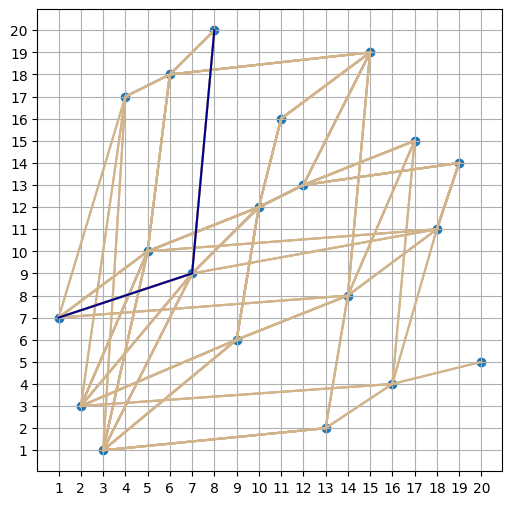

In [9]:
def find_sources(s):
    """finds sources of a sequence (all sources of MISS)

    Args:
        s (list): main sequence

    Returns:
        list: indices of source nodes
    """
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def lightest_row(s, w):
    """calls recursive function to find all MISS

    Args:
        s (list): main sequence

    Returns:
        2D numpy array: usage matrix MISS
    """
    m = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m, lightest, lightest_value
            m = np.concatenate((m, [row]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    plt.figure(figsize=(6, 6))

    plt.scatter(range(1, len(s) + 1), s)
    
    for row in m:
        indices = np.nonzero(row)
        plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='tan')

    plt.xticks(range(0, len(s) + 1))
    plt.yticks(range(0, len(s) + 1))
    plt.grid(True)

    indices = np.nonzero(lightest)
    plt.plot(indices[0] + 1, [s[i] for i in indices[0]], color='darkblue')

    return

pi =  [ 7,  3,  1, 17, 10, 18,  9, 20,  6, 12, 16, 13,  2,  8, 19,  4, 15, 11, 14,  5]
rho = [.1, .3, .4, .2, .5, .7, .2, .3, .9, .6, .3, .6, .1, .2, .4, .3, .4, .8, .9, .2]

lightest_row(pi, rho)

### Now we are ready to see the algorithms in action

Starting with the 1-modulus

(0.9999999999999993, array([0.2, 0.2, 0.2, 0.2, 0.2]))


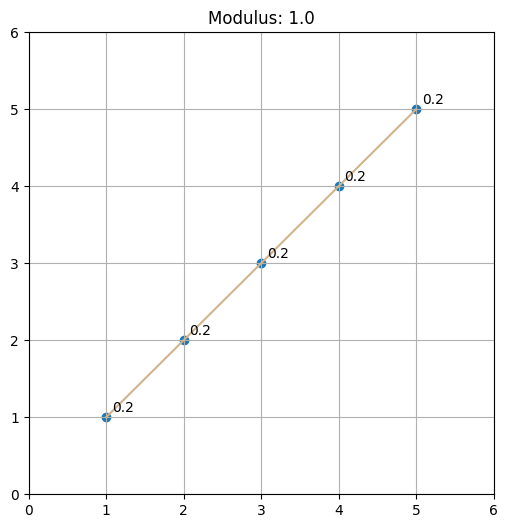

In [15]:
def find_sources(s):
    return [i for i, element in enumerate(s) if all(element < x for x in s[:i])]

def shortest_path(s, w):
    m = np.empty((0, len(s)))
    lightest = np.empty(len(s))
    lightest_value = math.inf
    def recurse(s, x, row):
        row[x] = 1
        greater = []
        for i in range(x, len(s)):
            if s[i] > s[x] and all(s[j] > s[i] for j in greater):
                greater.append(i)
        if len(greater) == 0:
            nonlocal m, lightest, lightest_value
            m = np.concatenate((m, [row]), axis=0)
            value = np.dot(row, w)
            if value < lightest_value:
                lightest_value = value
                lightest = row
            return
        for element in greater:
            recurse(s, element, row.copy())

    for source in find_sources(s):
        recurse(s, source, np.zeros(len(s))) 

    return m, lightest, lightest_value

def add_constraint(N, c):
    if N is None:
        return c
    return np.vstack((N, c))

def modulus(N, p):
    n = N.shape[-1]

    rho = cvx.Variable(n)

    cons = [rho >= 0, N@rho >= 1]

    obj = cvx.Minimize(cvx.pnorm(1**(1/p)*rho, p)**p)

    prob = cvx.Problem(obj, cons)
    prob.solve(solver=cvx.ECOS)

    return obj.value, np.array(rho.value).flatten()

pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)]

pi_decreasing = [x for x in range(5, 0, -1)]

pi_test = [2, 1, 3, 4, 5]

pi_test_2 = [2, 1, 3, 5, 4]

def ssmodulus(pi, p):
    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    while True:
        m, gP, lv = shortest_path(pi, rho)

        if lv > 1 - tol:
            plt.figure(figsize=(6, 6))
            plt.scatter(range(1, len(pi) + 1), pi)
            plt.title(f'Modulus: {round(mod, 3)}')
            for row in m:
                indices = np.nonzero(row)
                plt.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
            for i, j in enumerate(pi):
                plt.annotate(round(rho[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
            plt.xticks(range(0, len(pi) + 2))
            plt.yticks(range(0, len(pi) + 2))
            plt.grid(True)
            return mod, rho
        
        N = add_constraint(N, gP)

        mod, rho = modulus(N, p)

# one modulus
print(ssmodulus(pi_increasing, 1))


# print(ssmodulus(pi_test, 1))

# print(ssmodulus(pi, 1))

(4.999999999885006, array([1., 1., 1., 1., 1.]))


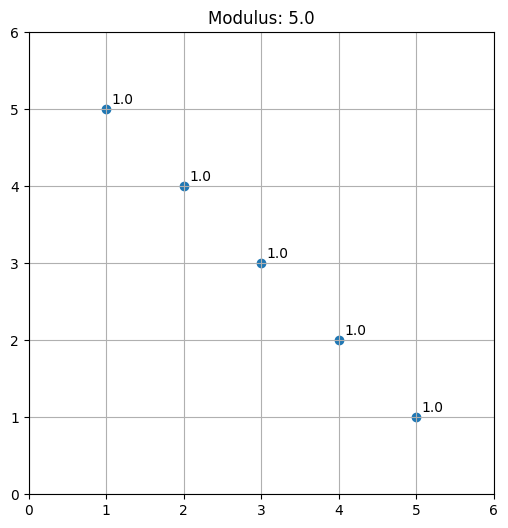

In [16]:
print(ssmodulus(pi_decreasing, 1))

(1.9999999996111701, array([0.4000072, 0.4000072, 0.2999964, 0.2999964, 0.5999928]))


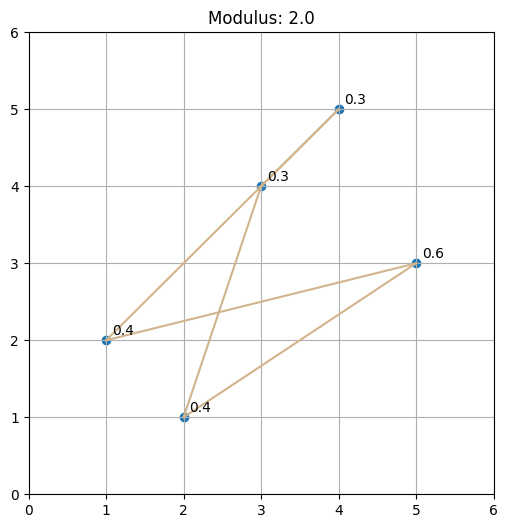

In [17]:
print(ssmodulus(pi_short, 1))

(1.0000000000156535, array([1.04243194e-11, 1.04242620e-11, 1.00000000e+00, 1.04242507e-11,
       1.04242620e-11]))


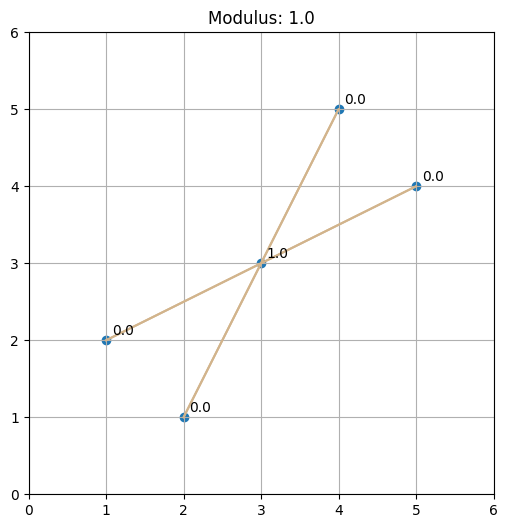

In [18]:
print(ssmodulus(pi_test_2, 1))

### Looking at both algorithms (2-modulus)

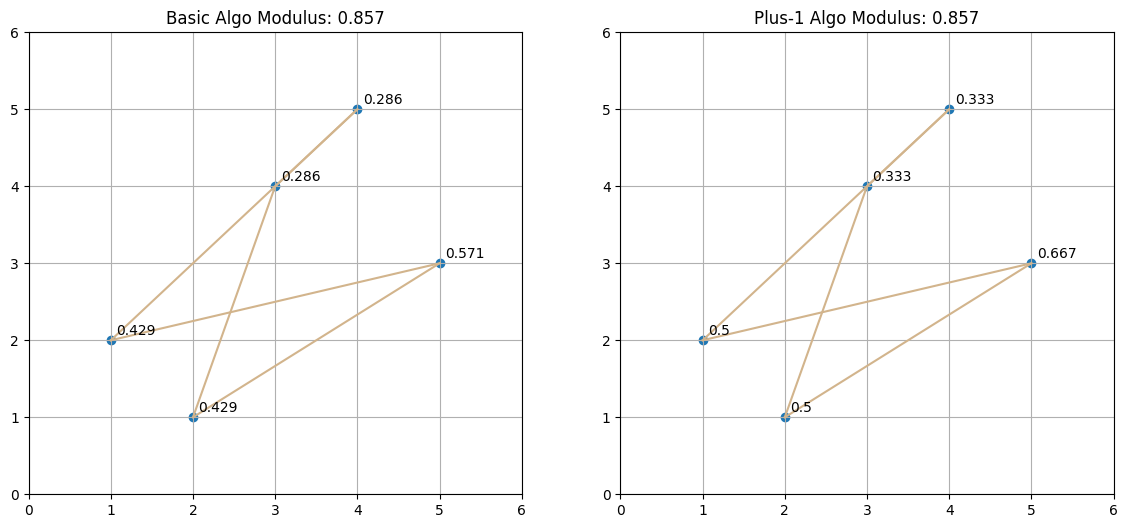

In [25]:
def plot_both(pi, p=2, num_iter=10000):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    rho = np.zeros(len(pi))
    mod = 0
    tol = 1e-5
    N = None

    while True:
        m, gP, lv = shortest_path(pi, rho)

        if lv > 1 - tol:
            # plt.figure(figsize=(6, 6))
            ax1.scatter(range(1, len(pi) + 1), pi)
            ax1.set_title(f'Basic Algo Modulus: {round(mod, 3)}')
            for row in m:
                indices = np.nonzero(row)
                ax1.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
            for i, j in enumerate(pi):
                ax1.annotate(round(rho[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
            ax1.set_xticks(range(0, len(pi) + 2))
            ax1.set_yticks(range(0, len(pi) + 2))
            ax1.grid(True)
            break
        
        N = add_constraint(N, gP)

        mod, rho = modulus(N, p)

    mod = 0
    n = np.zeros(len(pi))

    for it in range(num_iter):
        m, gP, lv = shortest_path(pi, n)
        for x in np.nonzero(gP):
            # n[x] += 1/len(x)
            n[x] += 1

    # n = n.T * n / num_iter**2
    n = n / num_iter
    mod = 1. / sum(i ** 2 for i in n)

    # plt.figure(figsize=(6, 6))
    ax2.scatter(range(1, len(pi) + 1), pi)
    ax2.set_title(f'Plus-1 Algo Modulus: {round(mod, 3)}')
    for row in m:
        indices = np.nonzero(row)
        ax2.plot(indices[0] + 1, [pi[i] for i in indices[0]], color='tan')
    for i, j in enumerate(pi):
        ax2.annotate(round(n[i], 3), (i + 1, j), xycoords='data', xytext=(4, 4), textcoords='offset points')
    ax2.set_xticks(range(0, len(pi) + 2))
    ax2.set_yticks(range(0, len(pi) + 2))
    ax2.grid(True)
    return



pi = [7, 3, 1, 17, 10, 18, 9, 20, 6, 12, 16, 13, 2, 8, 19, 4, 15, 11, 14, 5]

pi_short = [2, 1, 4, 5, 3]

pi_increasing = [x for x in range(1, 6)]

pi_test = [2, 1, 3, 4, 5]

pi_test_2 = [2, 1, 3, 5, 4]

plot_both(pi_short)

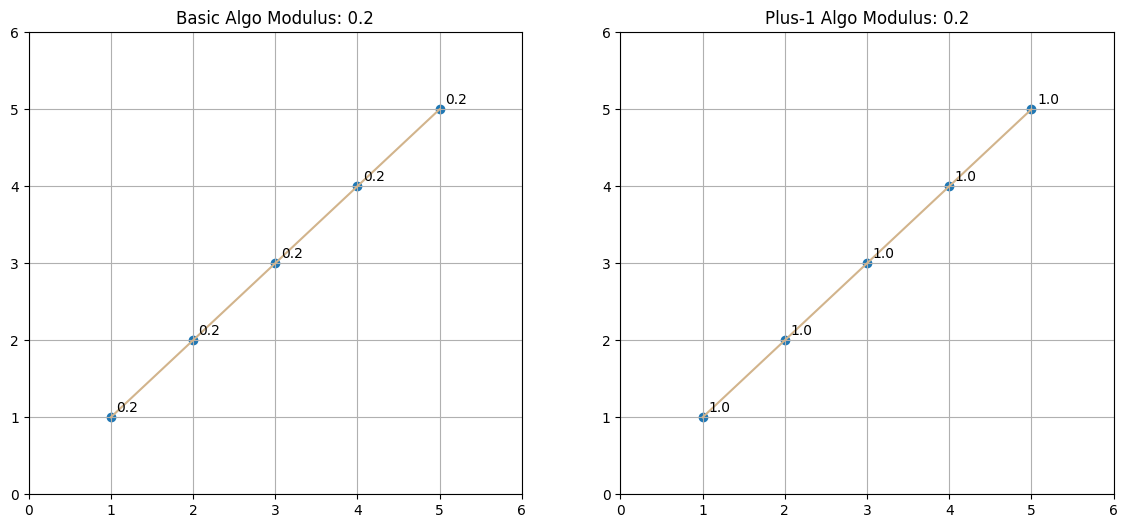

In [21]:
plot_both(pi_increasing)

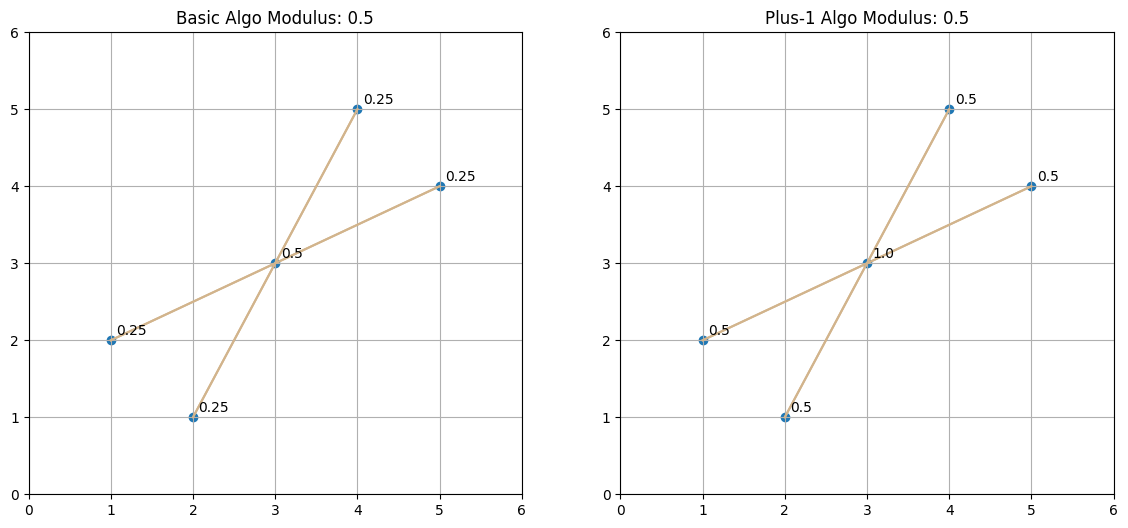

In [22]:
plot_both(pi_test_2)

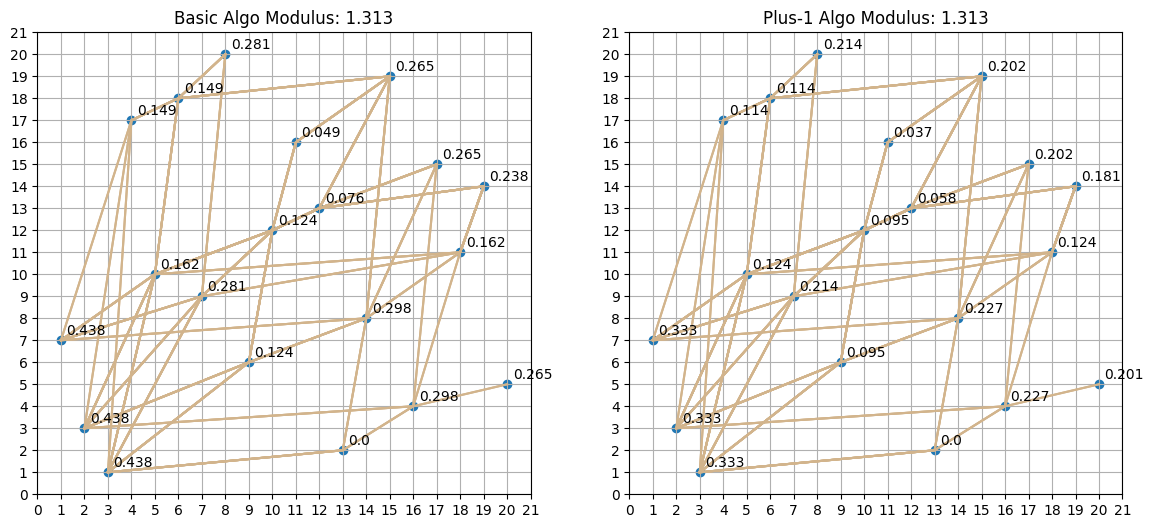

In [23]:
plot_both(pi)

### Observation

The Basic Algorithm computes $\rho^*$ - the optimal density

The Plus-1 Algorithm computes $\eta^*$ where $\eta(v) = \mathbb{P}(v \in \text{MISS})$

$\eta^* = \frac{\rho^*}{\|\rho^*\|^2}$

$\text{Mod} = (\sum_{i \in \eta^*} \eta(i)^2)^{-1}$


### Possible usages

+ MISS are commonly studied
+ edge-modulus generalizes graph concepts

### Future Work

+ fully implement and use algorithm detailed in Atallah et al.
+ try random permuatations and analyze results
+ explore modulus of Dominating Independent Sets

### Repo

<img src="repo.png" alt="qrcode" style="width: 200px">

Also if you're interested in learning more, take MATH 725/726